<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-машинного-обучения" data-toc-modified-id="Подготовка-данных-для-машинного-обучения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных для машинного обучения</a></span></li><li><span><a href="#Сформируем-выборки" data-toc-modified-id="Сформируем-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сформируем выборки</a></span></li><li><span><a href="#Применение-модели-машинного-обучения" data-toc-modified-id="Применение-модели-машинного-обучения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Применение модели машинного обучения</a></span></li><li><span><a href="#Исследование-баланса-классов-выборки" data-toc-modified-id="Исследование-баланса-классов-выборки-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследование баланса классов выборки</a></span></li><li><span><a href="#Проверка-адекватности" data-toc-modified-id="Проверка-адекватности-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверка адекватности</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей-на-сбалансированной-выборке" data-toc-modified-id="Обучение-моделей-на-сбалансированной-выборке-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение моделей на сбалансированной выборке</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевым признаком является столбец Exited — факт ухода клиента



In [6]:
#Проверим на дубликаты
df.duplicated().sum()

0

Заметим, что в одном из столбцов есть пропуски, есть три варианта решения:

1. Удалить объекты с пропущенными значениями, так как количество их не очень велико(около 10%)

2. Заменить пропуски на минимальное значение

3. Заменить пропуски на медианное значение

In [7]:
# Я остановлюсь на заполнении минимальным значением
df['Tenure'] = df['Tenure'].fillna(0)

In [8]:
df['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

Вывод

- RowNumber — столбец дублирует информацию стандартного датафрейма и не несетя ценности для обучения модели. Поэтому столбец можно удалить
- CustomerId — является идентификатором пользователя (по данному столбцу значению необходимо проверить наличие дубликатов) и если отсутсвуют — стоблец также можно удалить.
- Surname — является идентифицирующей пользователя информацией, содержит 2932 уникальных значений (данные kaggle), что сильно усложняет задачу, но не несет ценности для качества будущей модели — столбец можно удалить.
- CreditScore — следует проверить распределение и сохранить данный столбец.
- Geography — всего 3 уникальных значения France', 'Spain', 'Germany' — выполнить преобразование OHE / ordinal encoding
- Gender — значение преобразовать — OHE / ordinal encoding.
- Age — Exited — тип данных верны.

## Исследование задачи

### Подготовка данных для машинного обучения

In [9]:
#Обозначим новый датафрейм "data_ml" — данные для машинного обучения
#Удалим столбцы-идентификаторы, не представляющие ценностия для алгоритма 
for_drop = ['RowNumber','CustomerId', 'Surname']
df_ml = df.drop(for_drop, axis=1)
df_ml.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [10]:
df_ml.shape

(10000, 11)

In [11]:
# Данные подготовим методом OHE, что позволит нам использовать разные модели и не словить дамми ловушку
df_ml = pd.get_dummies(df_ml, drop_first=True)
df_ml.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
df_ml.shape

(10000, 12)

Вывод 

В новом датафрейме кол-во столбцов увеличелост на 1 (стало 12) Столбец Geography содержал 3 класса, Gender_Male 2 класса — в результате мы получили только 2 и 1 столбцов соответственно, что позволяет избежать дами-ловушки.

### Сформируем выборки

In [14]:
#Разделим на признаки и целевой признак
features = df_ml.drop('Exited', axis=1)
target = df_ml['Exited']

In [15]:
#Валид 60%
features_train, features_validtest, target_train, target_validtest = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345)

In [16]:
#Валид и тест соответственно поровну по 20% от общей
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345)

Были создана выборки:

- Обучающая

features_train target_train

- Валидационная

features_valid target_valid

- Тестовая

features_test target_test

In [17]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,567,35,8.0,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6.0,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2.0,147435.96,1,0,0,187508.06,1,0,0


In [18]:
#Для масштабирования методом scaler зафиксируем численные признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [19]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [20]:
#Масштабируем числ признаки обучающей выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.104696,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.104696,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-0.825373,1.140475,-0.891560,0,0,1.524268,1,0,0


In [21]:
#Масштабируем численные признаки валидационной выборки 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-0.825373,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.503694,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.468729,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.748053,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.748053,-1.233163,0.830152,1,0,1.358533,0,1,1


In [22]:
#Масштабируем численные признаки тестовой выборки 
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-0.825373,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.426375,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.139662,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.748053,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.748053,0.615625,-0.891560,0,1,-1.070919,0,0,1


### Применение модели машинного обучения

В результате мы получили масштабированные признаки для трех выборок. Перейдем к обучению моделей.

In [1]:
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=1515)
    DTC_score = model_DTC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_RFC = RandomForestClassifier(max_depth=5, n_estimators=43, min_samples_leaf=3, random_state=1515)
    RFC_score = model_RFC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    LgR_score = model_LgR.fit(features_train, target_train).score(features_valid, target_valid)
    print("Точность:" "дерево решений", DTC_score, "случайный лес ", RFC_score, "логистческая регрессия", LgR_score)

In [24]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.788 случайный лес  0.857 логистческая регрессия 0.8025


### Исследование баланса классов выборки

In [26]:
target_train.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

<AxesSubplot:ylabel='Frequency'>

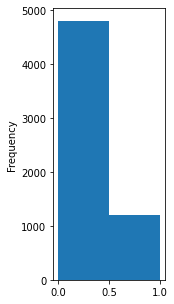

In [46]:
# Построим диаграмму баланса классов
target_train.plot(kind ='hist', bins=2, figsize=(2,5))


Как мы выяснили в нашей выборке отрицательны ответов ≈80% , положитительных ≈ 20%. С уверенностью можем сказать что имеется дисбаланс

### Проверка адекватности

Проверим качество моделей до борьбы с дисбалансом

In [47]:
#Заранее напишем функцию для изучия полноты, точности и F1-меры
def rec_prec_f1(target_valid, prediction):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))


In [48]:
# Функция для отображения соотношения ответов моделей (сколько 0, сколько 1)
def all_models_share(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=1515)
    model_DTC.fit(features_train, target_train)
    DTC_share = pd.Series(model_DTC.predict(features_valid)).value_counts(normalize = 1)
    
    
    
    model_RFC = RandomForestClassifier(random_state=1515, n_estimators = 100)
    model_RFC.fit(features_train, target_train)
    RFC_share = pd.Series(model_RFC.predict(features_valid)).value_counts(normalize = 1)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    model_LgR.fit(features_train, target_train)
    LgR_share = pd.Series(model_LgR.predict(features_valid)).value_counts(normalize = 1)
    

    
    print("Доли ответов:" "Дерево решений", DTC_share, "Случайный лес ", RFC_share, "Логистческая регрессия", LgR_share , end='')

In [49]:
#Применим функцию отображения соотношения ответов моделей
all_models_share(features_train, target_train, features_valid, target_valid)

Доли ответов:Дерево решений 0    0.801
1    0.199
dtype: float64 Случайный лес  0    0.8725
1    0.1275
dtype: float64 Логистческая регрессия 0    0.9125
1    0.0875
dtype: float64

Логистичесая регрессия показывала самую высокую точность, далее случайный лес и в конце дерево решений

С учетом дисбаланса результата неудивительно что модели с большой вероятностью будут выдавать ответ 0, построим матрицы ошибок для моделей



Случайный лес

In [50]:
model_RFC = RandomForestClassifier(random_state=1515, n_estimators = 100)
model_RFC.fit(features_train, target_train)
RFC_prediction = model_RFC.predict(features_valid)
confusion_matrix(target_valid, RFC_prediction)

array([[1527,   55],
       [ 218,  200]])

In [52]:
rec_prec_f1(target_valid, RFC_prediction)

Полнота 0.4784688995215311
Точность 0.7843137254901961
F1-мера 0.5943536404160475


In [53]:
#Расчет roc_auc_RFC
RFC_probabilities_one_valid = model_RFC.predict_proba(features_valid)[:, 1]

auc_roc_RFC = roc_auc_score(target_valid, RFC_probabilities_one_valid)

auc_roc_RFC

0.8406111820177958

Вывод 

Случайный лес примерно равную пропорцию позитивных и негативных предсказаний, выдает заметно больше качественных предсказаний, но также сильно склоняется к ложно позитивным предсказаниям (FP). Точность и качество также низкое.

Дерево решений

In [54]:
#Матрица ошибок для дерево решений
model_DTC = DecisionTreeClassifier(random_state=1515)
model_DTC.fit(features_train, target_train)
DTC_prediction = model_DTC.predict(features_valid)
confusion_matrix(target_valid, DTC_prediction)

array([[1380,  202],
       [ 222,  196]])

Вывод

Матрица показала, что дерево решений склонно выдавать позитивные предсказания, очень высокое количество ложных позитивных предсказания (FP).

In [57]:
rec_prec_f1(target_valid, DTC_prediction)

Полнота 0.4688995215311005
Точность 0.49246231155778897
F1-мера 0.4803921568627451


In [58]:
#Расчет roc_auc_DTC
DTC_probabilities_one_valid = model_DTC.predict_proba(features_valid)[:, 1]

auc_roc_DTC = roc_auc_score(target_valid, DTC_probabilities_one_valid)

auc_roc_DTC

0.6706065243559421

Вывод 

Видим низкое значение F1, следовательно низкое качество модели, проблема в точности.

Логистическая регрессия

In [59]:
#Матрица ошибок для логистической регрессии
model_LgR = LogisticRegression(solver = 'liblinear')
model_LgR.fit(features_train, target_train)
LgR_prediction = model_LgR.predict(features_valid)
confusion_matrix(target_valid, LgR_prediction)

array([[1506,   76],
       [ 319,   99]])

In [60]:
rec_prec_f1(target_valid, LgR_prediction)

Полнота 0.23684210526315788
Точность 0.5657142857142857
F1-мера 0.33389544688026984


In [61]:
#Для логистической регрессии расчитаем метрику AUC-ROC
LgR_probabilities_one_valid = model_LgR.predict_proba(features_valid)[:, 1]

auc_roc_LgR = roc_auc_score(target_valid, LgR_probabilities_one_valid)

auc_roc_LgR

0.7586317967081824

In [62]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()
    plt.show()

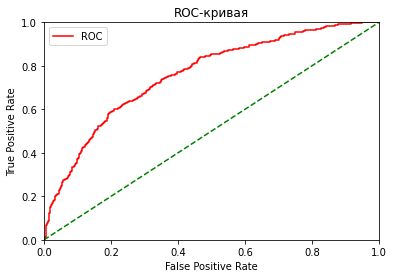

In [63]:
fper, tper, thresholds = roc_curve(target_valid, LgR_probabilities_one_valid)
plot_roc_curve(fper, tper)

Score 0.701
AUC-ROC 0.7635798063138539


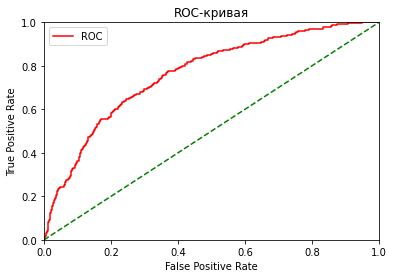

In [64]:
#Попробуем обучать логистическую регресию сбалансировав классы
model_LgR = LogisticRegression(solver = 'liblinear', class_weight='balanced')
model_LgR.fit(features_train, target_train)
LgR_probabilities_one_valid_class_weight = model_LgR.predict_proba(features_valid)[:, 1]
print("Score", model_LgR.score(features_valid, target_valid))
print("AUC-ROC", roc_auc_score(target_valid, LgR_probabilities_one_valid_class_weight))

fper, tper, thresholds = roc_curve(target_valid, LgR_probabilities_one_valid_class_weight) 
plot_roc_curve(fper, tper)

Вывод 

Отстутсвие улучшений - тоже результат. Высокая точность модели объясняется высокой долей негативных ответов в валидационной выборке.

## Борьба с дисбалансом

Как мы выяснили ранее в нашей выборке отрицательны ответов ≈80% , положитительных ≈ 20%. Нам необходмо увеличить количество положительных ответов в 4 раза для достижения баланса. Либо же уменьшить кол-во отрицтаельных ответов.

- Разделим обучающую выборку на отрицательные и положительные объекты;
- Скопируем несколько раз положительные объекты;
- С учётом полученных данных создадим новую обучающую выборку;
- Перемешаем данные: идущие друг за другом одинаковые вопросы не помогут обучению.
- Обучим новые модели

In [65]:
#Создадим функцию для увеличения представленной класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
    """Функция принимаем значение признаков (features[]), целевого признака (target[]), repeat(int / float),
    класс который будет увеличен (upsampled_сlass (0 or 1))"""
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0  
        
        
       
    return features_upsampled, target_upsampled

In [66]:
#Создадим функцию для уменьшения представленной класса в выборке 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
  

In [67]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, fraction=0.25)

In [68]:
#Протестируем функцию (верное значение)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 0)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.941407
1    0.058593
Name: Exited, dtype: float64
(20412,)


In [69]:
#Протестируем функцию (верное значение)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 3)
features_train_upsampled

0

In [70]:
#Применим функцию upsample 
#увеличим количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.501043
1    0.498957
Name: Exited, dtype: float64
(9588,)


In [71]:
#Применим функцию downsample
#Уменьшим кол-в пооложительных ответов в 4 раза
#Протестируем функцию (верное значение)
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, 0.2)
print(target_downsampled_train.value_counts(normalize = 0))
print(target_downsampled_train.shape)

1    1196
0     961
Name: Exited, dtype: int64
(2157,)


<AxesSubplot:ylabel='Frequency'>

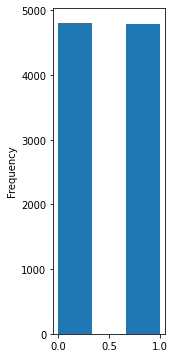

In [74]:
#Ну почти идеально и выигрышнее выглядит upsample с ним и будем работать
target_train_upsampled.plot(kind ='hist', bins=3, figsize=(2,6))

### Обучение моделей на сбалансированной выборке

In [75]:
#Точность моделей на выборке с дисбалансом
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.788 случайный лес  0.857 логистческая регрессия 0.8025


In [77]:
#Точность моделей на сбалансированной выборке
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Точность:дерево решений 0.7805 случайный лес  0.813 логистческая регрессия 0.701


In [78]:
#Решающее дерево
model_DTC_upsampled = DecisionTreeClassifier(random_state=1515)
model_DTC_upsampled.fit(features_train_upsampled, target_train_upsampled)
DTC_prediction_upsampled = model_DTC_upsampled.predict(features_valid)
rec_prec_f1(target_valid, DTC_prediction_upsampled)

Полнота 0.45454545454545453
Точность 0.47381546134663344
F1-мера 0.46398046398046394


In [79]:
#Расчитаем auc_roc для DTC на сбалансированной выборке
DTC_upsampled_valid = model_DTC_upsampled.predict_proba(features_valid)[:, 1]

auc_roc_DTC = roc_auc_score(target_valid, DTC_upsampled_valid)

auc_roc_DTC

0.6605849902310079

In [80]:
#Случайный лес
model_RFC_upsampled = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=1515)
model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction_upsampled = model_RFC_upsampled.predict(features_valid)
rec_prec_f1(target_valid, RFC_prediction_upsampled)

Полнота 0.722488038277512
Точность 0.5392857142857143
F1-мера 0.6175869120654396


In [81]:
#Расчитаем auc_roc для RFC на сбалансированной выборке
RFC_upsampled_valid = model_RFC_upsampled.predict_proba(features_valid)[:, 1]

auc_roc_RFC = roc_auc_score(target_valid, RFC_upsampled_valid)

auc_roc_RFC

0.8527604207622839

In [82]:
#Логистическая регрессия
model_LgR_upsampled = LogisticRegression(solver = 'liblinear', class_weight='balanced')
model_LgR_upsampled.fit(features_train_upsampled, target_train_upsampled)
LgR_prediction_upsampled = model_LgR_upsampled.predict(features_valid)
rec_prec_f1(target_valid, LgR_prediction_upsampled)

Полнота 0.6842105263157895
Точность 0.3803191489361702
F1-мера 0.4888888888888888


In [83]:
#Расчитаем auc_roc для LgR на сбалансированной выборке
LgR_upsampled_valid = model_LgR_upsampled.predict_proba(features_valid)[:, 1]

auc_roc_LgR = roc_auc_score(target_valid, LgR_upsampled_valid)

auc_roc_LgR

0.7634815115020053

Вывод

Показаели всех моделей улучшились.

Лучшие результаты показывает алгоритм случайный лес (RandomForestClassifier). На валидационной выборке RandomForestClassifier уже показывает резульаты F1 меры = 0.61, что выше целевого целевого значения.

## Тестирование модели

In [84]:
#Обучим финальную модель
model_RFC_final = RandomForestClassifier(
    bootstrap = True, class_weight = 'balanced', max_depth= 7,  n_estimators = 43, random_state=12345)
model_RFC_final.fit(features_train_upsampled, target_train_upsampled)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=43,
                       random_state=12345)

In [85]:
model_RFC_final_prediction = model_RFC_final.predict(features_test)
rec_prec_f1(target_test, model_RFC_final_prediction)

Полнота 0.7210401891252955
Точность 0.5152027027027027
F1-мера 0.6009852216748769


In [86]:
#Расчитаем auc_roc для RFC на тестовой выборке
model_RFC_final_valid = model_RFC_final.predict_proba(features_test)[:, 1]

auc_roc_RFC = roc_auc_score(target_test, model_RFC_final_valid)

auc_roc_RFC

0.8493323799115837

In [87]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(target_test))
target_predict_constant.value_counts()

0    2000
dtype: int64

In [88]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(target_valid, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_test, model_RFC_final_prediction))
#Дополнительно сравним AUC-ROC — единственный параметр подающийся сравнению, потому что константная подель содержит только негативные ответы
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_test, model_RFC_final_valid))


accuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.7975
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8493323799115837


Финальная модель показывает результаты лучше, чем константная модель — модель можно считать адекватной.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

## Выводы
- В первоначальные данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными), из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели не первоначальных данных характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1) — модели показывали низкие результаты точности и полноты.

- Мы устранили дисбаланс классов в обучающей выборки методом upsampling — увеличили количество значений позитивного класса в 4 раза. Так мы достигли баланса классо в обучеющей выборки: 0 - 0.501043 1 - 0.498957

- Разобрали несколько вариантов борьбы с дисбалансом upsampling и downsampling

- На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели случайного леса:

    - Полнота 0.722488038277512
    - Точность 0.5392857142857143
    - F1-мера 0.6175869120654396
    - AUC-ROC 0.8527604207622839

- Финальная модель прошла проверку на адекватность в сравнении с контантной моделью: accuracy_score константой модели: 0.796

    - aaccuracy_score константой модели: 0.791
    - accuracy_score финальной модели: 0.7975
    - AUC-ROC константой модели: 0.5
    - AUC-ROC финальной модели: 0.8493323799115837